In [80]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
# Load dataset 
data = pd.read_csv("Question 1 datasets .csv")

In [84]:
# View the first 5 rows
print(data.head())

   Index  Temperature  Vibration  Pressure  Runtime  Days to Failure
0      0        64.98       5.93     76.19      204            669.9
1      1        88.03       4.25    124.15      665            619.4
2      2        79.28       4.48    100.32      803            688.7
3      3        73.95       6.70    119.59      881            577.7
4      4        56.24       5.82     89.20      733            595.7


In [86]:
# Features and target
X = data.drop("Days to Failure", axis=1)
y = data["Days to Failure"]

In [88]:
# Scale features (important for boosting stability)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [92]:
# Gradient Boosting Model
gbr = GradientBoostingRegressor(
    n_estimators=200,     # number of boosting stages
    learning_rate=0.05,   # step size
    max_depth=4,          # depth of trees
    random_state=42
)

In [94]:
# Fit model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

In [96]:
# Predictions
y_pred = gbr.predict(X_test)

In [98]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [100]:
print("Cross-validated RMSE:", cv_rmse.mean())
print("Cross-validated R²:", cv_r2.mean())

Cross-validated RMSE: 142.57090054828885
Cross-validated R²: -0.23218499973196974


In [102]:
# Cross-validation
cv_rmse = np.mean(np.sqrt(-cross_val_score(gbr, X_scaled, y, scoring="neg_mean_squared_error", cv=10)))
cv_r2 = np.mean(cross_val_score(gbr, X_scaled, y, scoring="r2", cv=10))

print("Gradient Boosting RMSE:", rmse)
print("Gradient Boosting R²:", r2)
print("Cross-validated RMSE:", cv_rmse)
print("Cross-validated R²:", cv_r2)

Gradient Boosting RMSE: 155.03825055236686
Gradient Boosting R²: -0.14180643740525678
Cross-validated RMSE: 142.57090054828885
Cross-validated R²: -0.23218499973196974


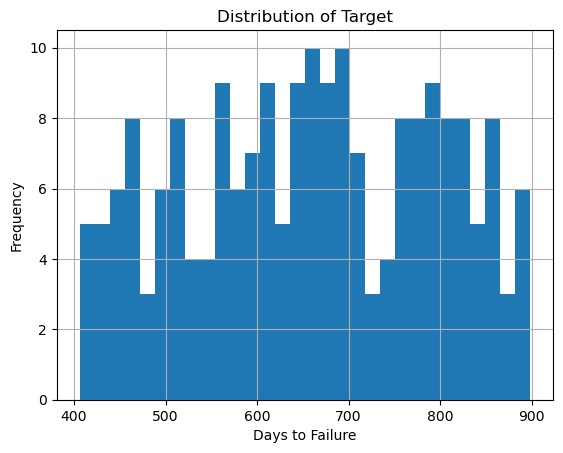

In [108]:
# Check target distribution
import matplotlib.pyplot as plt
data["Days to Failure"].hist(bins=30)
plt.xlabel("Days to Failure")
plt.ylabel("Frequency")
plt.title("Distribution of Target")
plt.show()


In [111]:
#Feature importance
importances = gbr.feature_importances_
for f, imp in zip(data.drop("Days to Failure", axis=1).columns, importances):
    print(f"{f}: {imp:.4f}")


Index: 0.2050
Temperature: 0.2162
Vibration: 0.1825
Pressure: 0.1904
Runtime: 0.2059


In [117]:
y = np.log(data["Days to Failure"])

